<div style="text-align: center; font-size: 30px;">
Prácticas de Estadística<br/>
</div>
<div style="text-align: center; font-size: 30px;">
Análisis bidimensional y Regresión
</div>
<div style="text-align: center; font-size: 16px; font-style: italic">
Material elaborado por M. Dolores Frías, Jesús Fernández y Carmen M. Sordo profesores del Departamento de Matemática Aplicada y Ciencias de la Computación de la Universidad de Cantabria.
</div>

# Objetivos

R permite realizar estudios de más de una variable. En particular en esta práctica nos centraremos
en el caso de 2 variables con el fin de estudiar el comportamiento de una de ellas a partir de otra.

# Análisis descriptivo de variables bidimensionales

## Tablas de doble entrada

En primer lugar construimos la tabla de doble entrada con dos variables no numéricas que seleccionamos del fichero *Pulsaciones.rda* como son *Actividad* que debemos ordenar de menos a más actividad y *Fumar*.

In [21]:
# Establecemos el directorio donde se almacenan los ficheros de datos en GitHub
setwd("data/") 
# Carga de lo datos del fichero
load("Pulsaciones.rda") 
attach(Pulsaciones)
# Ordenamos Actividad
actividad.order <- ordered(Actividad, levels=c( "baja", "media", "alta"))
# Tabla de doble entrada
table("Actividad fisica"=actividad.order, "Tabaco"=Fumar)

The following objects are masked from Pulsaciones (pos = 3):

    Actividad, Altura, Correr, Fumar, Peso, Pulso1, Pulso2, Sexo


The following objects are masked from Pulsaciones (pos = 4):

    Actividad, Altura, Correr, Fumar, Peso, Pulso1, Pulso2, Sexo




                Tabaco
Actividad fisica fuma no fuma
           baja     3       6
           media   19      42
           alta     6      16

Del resultado de la tabla podemos ver por ejemplo, que la mayoría de las personas que realizan una actividad *media* o *alta* son no fumadores.

Como ocurría en el caso unidimensional, si queremos agrupar los datos de variables continuas o discretas con muchos valores posibles debemos agrupar primero los valores en intervalos con la función `cut` indicando de donde a donde va cada uno de los intervalos y si estos se deben cerrar por la derecha o por la izquierda. Así, sabiendo que el criterio de Sturges nos indica que debemos definir 8 intervalos, la tabla de doble entrada para las variables *Pulso1* y *Pulso2* se puede obtener como:

In [22]:
n <- length(Pulso1)
# Criterio de Sturges
floor(3/2+log(n)/log(2)) 
range(Pulso1)
range(Pulso2)
# Tabla de doble entrada
table(cut(Pulso1, seq(44, 105, 7)), cut(Pulso2, seq(50, 150, 12), right=FALSE))

[1] 8

[1]  48 100

[1]  50 140

          
           [50,62) [62,74) [74,86) [86,98) [98,110) [110,122) [122,134)
  (44,51]        1       0       0       0        0         0         0
  (51,58]        4       1       0       0        0         0         0
  (58,65]        2       9       4       1        2         0         0
  (65,72]        0      16       8       1        2         1         0
  (72,79]        0       1      11       0        1         2         0
  (79,86]        0       0       8       1        1         0         1
  (86,93]        0       0       4       5        0         1         0
  (93,100]       0       0       0       1        0         2         0
          
           [134,146)
  (44,51]          0
  (51,58]          0
  (58,65]          0
  (65,72]          0
  (72,79]          0
  (79,86]          0
  (86,93]          0
  (93,100]         1

De la tabla podemos ver que hay 16 personas que tienen un peso mayor de 65 y menor o igual que 72 Kg y una altura mayor o igual que 62 cm y menor de 74 cm. 

Los valores que se muestran son frecuencias absolutas, pero podríamos obtener las frecuencias relativas sin más que dividir entre el tamaño de la muestra. Vemos en la siguiente tabla que esas 16 personas representan el 17.4% de la muestra.

In [23]:
round(table(cut(Pulso1, seq(44, 105, 7)), cut(Pulso2, seq(50, 150, 12), right=FALSE))/n,3)

          
           [50,62) [62,74) [74,86) [86,98) [98,110) [110,122) [122,134)
  (44,51]    0.011   0.000   0.000   0.000    0.000     0.000     0.000
  (51,58]    0.043   0.011   0.000   0.000    0.000     0.000     0.000
  (58,65]    0.022   0.098   0.043   0.011    0.022     0.000     0.000
  (65,72]    0.000   0.174   0.087   0.011    0.022     0.011     0.000
  (72,79]    0.000   0.011   0.120   0.000    0.011     0.022     0.000
  (79,86]    0.000   0.000   0.087   0.011    0.011     0.000     0.011
  (86,93]    0.000   0.000   0.043   0.054    0.000     0.011     0.000
  (93,100]   0.000   0.000   0.000   0.011    0.000     0.022     0.000
          
           [134,146)
  (44,51]      0.000
  (51,58]      0.000
  (58,65]      0.000
  (65,72]      0.000
  (72,79]      0.000
  (79,86]      0.000
  (86,93]      0.000
  (93,100]     0.011

## Diagrama de dispersión

Con el fin de analizar la relación entre dos variables también resulta
interesante la realización de distintos tipos de gráficos como es el
diagrama de dispersión analizado en clase. En este caso vamos a estudiar la
relación que existe entre las variables *Peso* y *Altura* del fichero *Pulsaciones.rda*:

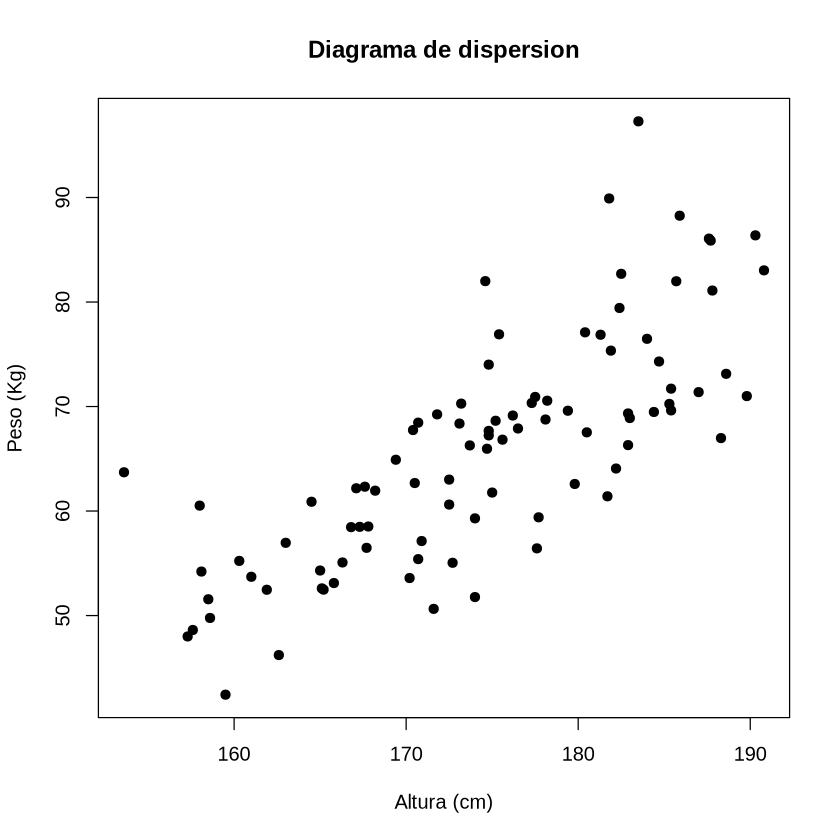

In [24]:
plot(Altura, Peso, main="Diagrama de dispersion", pch=19, xlab="Altura (cm)", ylab="Peso (Kg)")

Podemos mejorar la representación anterior utilizando la función `scatterplot`
de la librería `car` que debemos instalar (este proceso solo se realiza una
vez) y cargar con la función `library`. Recordar que debemos cargar esta
librería cada vez que iniciemos R y queramos utilizar alguna función
contenida en este paquete. 

In [25]:
install.packages('car')


also installing the dependencies ‘cowplot’, ‘ggplot2’, ‘doBy’, ‘pbkrtest’, ‘scales’


Warning message in install.packages("car"):
“installation of package ‘scales’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘ggplot2’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘cowplot’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘doBy’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [26]:
library(car)
scatterplot(Peso~Altura, smooth=FALSE)

ERROR: Error in library(car): there is no package called ‘car’


La función `scatterplot` dibuja la recta de
regresión que mejor se ajuste a la nube de puntos considerando el criterio de
mínimos cuadrados. Además también dibuja los boxplots de cada variable en
su eje correspondiente. Consultar la ayuda de la función `scatterplot` para
ver todas las opciones que ofrece.

A la vista de la figura, se deduce que existe una relación lineal directa entre ambas variables. Lineal porque la nube de puntos se concentra alrededor de una recta y directa porque cuando una variable aumenta la otra también (pendiente de la recta positiva). Para cuantificar
esta relación lineal entre las dos variables vamos a calcular el coeficiente de correlación lineal. La función `cor.test` o `cor` nos proporcionan este valor:

In [ ]:
cor(Altura, Peso)

que por defecto calcula el coeficiente de correlación de Pearson aunque como se indica en la ayuda de esta función también puede calcular el de Kendall o Spearman.

Como ya esperábamos el coeficiente de correlación lineal es relativamente alto y positivo (0.7718114) lo que confirma la relación lineal directa entre las variables que ya observábamos en el diagrama de dispersión.

<div class="alert alert-block alert-info">
<strong>PRACTICA TÚ MISMO</strong>

- Representar un diagrama de dispersión de *Pulso1* frente al *Pulso2*.
  1. Añadir un título apropiado.
  2. ¿Qué sugiere el gráfico sobre la relación entre estas dos variables? 
  3. Añadir *Correr* como variable de agrupamiento.
  4. ¿Difiere mucho la relación entre *Pulso1* y *Pulso2* entre los que corrieron y los que no?

</n>

- Hacer un diagrama de dispersión de la *Altura* frente al *Peso* separando por sexos y responder a las siguientes preguntas:
  1. ¿Aumenta en la misma proporción la altura con el peso en los hombres y en las mujeres?
  2. ¿Cuál de los dos grupos presenta un valor de la correlación mayor? Indicar el valor en cada caso. Nota: En este caso se necesita filtrar los datos por *Sexo* antes de calcular el coeficiente de correlación.
</div>

# Regresión lineal

La función `lm` de R es la que nos permite ajustar un modelo de regresión
lineal ya sea simple ($\hat{y}=a+bx$) con la orden `lm(y~x)` o
múltiple ($\hat{y}=\beta_0+\beta_1x_1+...+\beta_px_p$) con la orden
`lm(y~x1+x2+...+xp)`. 

A modo de ejemplo podemos aplicar un modelo de regresión lineal simple
considerando la variable *Peso* en función de la *Altura*. La
relación lineal entre estas variables ya la estudiamos con el gráfico de
dispersión  y el coeficiente de
correlación, considerando que este tipo de modelo es adecuado. En primer
lugar se indica la variable dependiente (*Peso*), seguido de la variable
independiente (*Altura*), separadas por el carácter `~`. 

In [27]:
lm(Peso~Altura)


Call:
lm(formula = Peso ~ Altura)

Coefficients:
(Intercept)       Altura  
   -93.8949       0.9152  


como resultado obtenemos los valores de los parámetros a y b:

$\hat{y}=-93.89492 + 0.91516x$ 

Para trabajar mejor con esos valores podemos guardar la salida de `lm` en una variable. Eso nos permite obtener distintos resultados calculados en el ajuste de la forma:

In [30]:
RegMod <- lm(Peso~Altura)
# parámetros del ajuste
coef(RegMod)
# Estadística del modelo lineal
summary(RegMod)

(Intercept)      Altura 
-93.8949207   0.9151585


Call:
lm(formula = Peso ~ Altura)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5727  -4.7486  -0.0001   3.5080  23.2533 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -93.89492   13.88816  -6.761 1.33e-09 ***
Altura        0.91516    0.07947  11.515  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.981 on 90 degrees of freedom
Multiple R-squared:  0.5957,	Adjusted R-squared:  0.5912 
F-statistic: 132.6 on 1 and 90 DF,  p-value: < 2.2e-16


La orden `summary` que se ha ejecutado nos da información adicional
sobre los residuos (su mínimo, máximo y cuartiles), los valores del corte con el eje y la pendiente, el error estándar de la estimación ($S_e=\sqrt{\frac{E^2}{n-2}}$), el coeficiente de determinación (*R-squared*) y el coeficiente de determinación ajustado (*Adjusted R-squared*), entre otros. 

Como ya sabemos, el valor del coeficiente de determinación está confinado en el intervalo [0,1] y da información de la bondad del ajuste. Cuanto más próximo esté el valor a 1 mejor se ajusta el modelo a los datos. Normalmente este valor se da en tanto por ciento. En este caso, al tratarse de un modelo de regresión lineal simple, el dato del coeficiente de determinación *R-squared*, se puede calcular como $r^2=\frac{S^2_n(\hat y)}{S^2_n(y)}$, e indica la proporción de la variación total de la variable dependiente Y que es explicada por el modelo de regresión o que se debe a la variación en la variable independiente X. 

En R, el coeficiente de determinación ajustado se calcula como:

$R^2_{ajustado} = 1 - \frac{n-1}{n-(p+1)} (1 - R^2)$

siendo n el tamaño de la muestra y p el número de predictores considerados en el modelo. Es decir, penaliza la bondad del ajuste en aquellos casos en los que haya más predictores y el tamaño de la muestra sea pequeño. La diferencia entre ambos coeficientes indica por tanto que hay demasiados predictores en relación con el tamaño de la muestra considerado y por tanto el ajuste del modelo es peor si se considera otro conjunto de datos. 

Al haber guardado la salida de la función `lm` en una variable, también es posible obtener las series de los residuos $\epsilon=(y_i-\hat{y}_i)$ y de los datos ajustados $(\hat{y}_i)$ con el modelo lineal ejecutando los comandos:

In [31]:
# Residuos
residuals(RegMod)

1            2            3            4            5            6 
  1.91526147  -7.17756844  -5.85971828  12.02695607   2.19915199  -0.82485373 
           7            8            9           10           11           12 
 -4.67908429   7.99967077  17.42910591 -10.97937824  -5.57397187  -4.14756844 
          13           14           15           16           17           18 
  1.97731914   3.77707127   5.90032780   6.40001081  16.10824709   1.98575721 
          19           20           21           22           23           24 
  3.12815492   3.15193582   4.84668516   1.37367650  -9.32874425   2.31267943 
          25           26           27           28           29           30 
 17.03657553  -4.72835814  -6.04265781  -0.95992007   2.42501360 -12.20722840 
          31           32           33           34           35           36 
-13.57265781  -0.02326876   1.16521539   0.40229889  -9.10295177   8.28118662 
          37           38           39           40           41           42 
 -0.68451370  10.28612029   2.37428745  23.25333646   5.70191278   0.02308859 
          43           44           45           46           47           48 
 -4.06546468  -5.43394883  -3.76118805   5.92069088   0.26944594   5.93998777 
          49           50           51           52           53           54 
 -8.80216207   2.84435657   7.93521539  -0.29351663  -5.38030619   3.85098483 
          55           56           57           58           59           60 
-11.44942432  -6.14546468  -0.33480765   0.54039693   9.57849496   6.12025868 
          61           62           63           64           65           66 
  1.21188973   1.59521539   2.77759006  -8.06057710  -8.77695749  -4.48781631 
          67           68           69           70           71           72 
 -6.92263477   5.66946898  -1.14867513  -3.21593739  -0.72109588   9.81987814 
          73           74           75           76           77           78 
  3.41836229   0.26440265  -5.37566647   4.24134791  -3.09715928  -4.80926304 
          79           80           81           82           83           84 
 -2.79623134  -4.59774719  -8.68985095  -8.27505553   1.78399349 -12.50627742 
          85           86           87           88           89           90 
 -1.79924000  -1.71405846  -9.64285960   1.68408565  -3.34992007  -1.47921696 
          91           92 
  6.13736523  -2.05951091

In [32]:
# Valores de Y estimados
fitted(RegMod)

1        2        3        4        5        6        7        8 
60.03474 73.48757 77.23972 76.23304 66.44085 75.13485 73.57908 77.88033 
       9       10       11       12       13       14       15       16 
72.48089 72.38938 78.70397 73.48757 68.36268 61.13293 71.19967 73.02999 
      17       18       19       20       21       22       23       24 
65.89175 74.49424 77.97185 59.02806 72.02331 69.18632 68.72874 80.71732 
      25       26       27       28       29       30       31       32 
46.67342 57.83836 65.34266 63.96992 52.80499 68.63723 65.34266 65.98327 
      33       34       35       36       37       38       39       40 
66.07478 51.15770 64.15295 77.78881 70.28451 66.62388 68.54571 74.03666 
      41       42       43       44       45       46       47       48 
62.04809 66.80691 75.77546 75.68395 71.29119 63.32931 67.63055 76.05001 
      49       50       51       52       53       54       55       56 
79.80216 59.48564 66.07478 58.75352 74.86031 64.51902 78.42942 75.77546 
      57       58       59       60       61       62       63       64 
69.09481 62.13960 73.12151 80.25974 65.06811 66.07478 72.57241 70.65058 
      65       66       67       68       69       70       71       72 
72.84696 66.25782 62.32263 64.61053 59.66868 58.29594 59.21110 50.70012 
      73       74       75       76       77       78       79       80 
50.79164 53.44560 62.50567 56.64865 59.57716 57.28926 57.10623 57.19775 
      81       82       83       84       85       86       87       88 
54.90985 61.86506 67.35601 63.14628 54.26924 50.33406 52.07286 55.27591 
      89       90       91       92 
63.96992 51.24922 62.32263 50.05951

Con esas series sería posible analizar el ajuste del modelo estudiando el comportamiento de los residuos. Para ello podemos dibujar los residuos frente a los datos estimados y ver como se comporta su media y varianza. R nos proporciona una serie de gráficos de ajuste del modelo (incluido el anterior) a través de las siguientes órdenes:

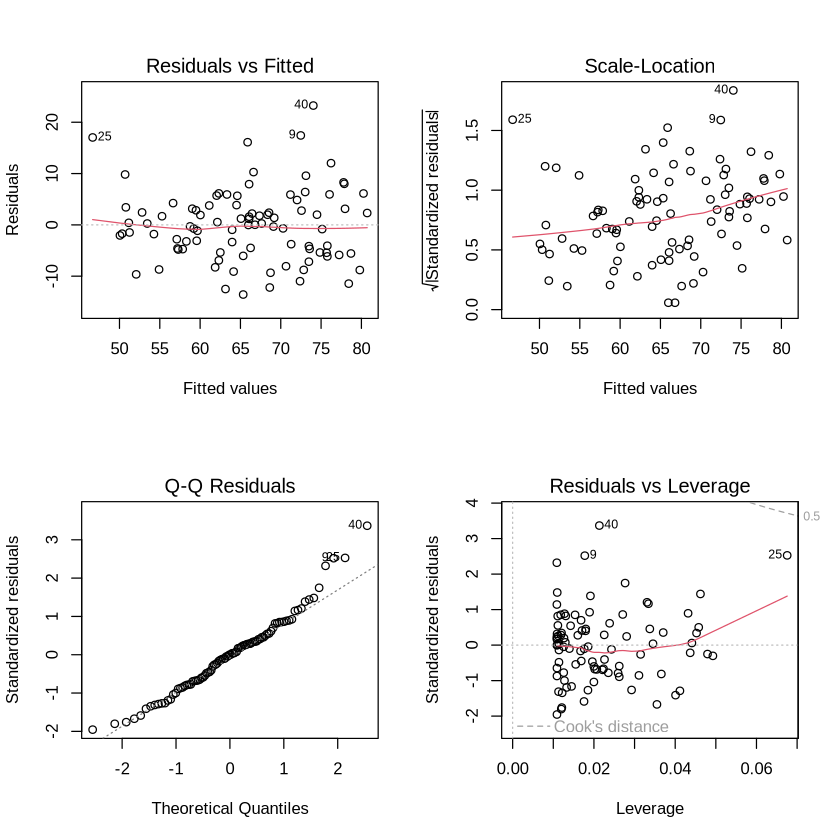

In [33]:
layout(matrix(c(1,2,3,4),2,2))
plot(RegMod)

Por ejemplo la primera figura muestra el gráfico de los residuos frente a los valores ajustados que hemos analizado en clase. Recordar que el caso ideal es que la media de los residuos sea cero y la varianza constante. Además la distribución de los puntos debe ser totalmente aleatoria, es decir no debe aparecer ningún patrón en ese gráfico ya que sino indicaría que no hemos modelizado bien los datos. 

Una vez analizada la bondad de ajuste del modelo y estudiado el comportamiento de los residuos, si consideramos que el modelo es adecuado podemos predecir el valor de la variable dependiente (Ŷ) para un valor concreto de la variable independiente (X). En este caso, podemos obtener el valor del peso para un valor de la altura de 185.7 cm con la orden `predict`:

In [ ]:
newdata <- data.frame(Altura=185.7)
predict(RegMod, newdata)

A partir del modelo ajustado obtenemos que el valor estimado del peso para una
altura de 185.7 cm es de 76.05 Kg. 

En la ayuda de la función `predict`, se indica que es preciso pasarle los
datos que se quieren usar para predecir como un data frame con el mismo nombre de la variable que el usado para ajustar el modelo. En otro caso la sentencia
anterior dará un error. 

<div class="alert alert-block alert-info">
<strong>PRACTICA TÚ MISMO</strong>

- Calcular la ecuaciones de la recta de ajuste del *Peso* en función de la *Altura* agrupados por *Sexo* y contestar a las siguientes preguntas:
  1. Escribir la ecuación resultante para las mujeres.
  2. ¿Cuál es la pendiente de la recta obtenida en el caso de los hombres?
  3. ¿Para que *Sexo* el modelo se ajusta mejor? ¿Por qué? 

</n>

- Un ciclista se desplaza en línea recta con un movimiento uniforme para el
cual según las leyes de la mecánica su posición x en un instante t
vendrá dada por la ecuación $x=x_0+vt$ donde $x_0$ es la posición inicial
y v la velocidad.</n>

  Se han tomado los siguientes valores de su posición x en metros y el tiempo t en segundos:
  
    x (metros)  14 26.2 37.7 51 61.8 76 84.2
  
    t (segundos) 2 4 6 8 10 12 14
  </n>

    A partir de estos datos estimar:
  1. el coeficiente de correlación
  2. los valores de la posición inicial y la velocidad del ciclista por medio de una regresión lineal.
  3. el espacio recorrido por el ciclista transcurridos 9 segundos.
  4. el error estandar de la estimación y la fracción de varianza explicada por el modelo.

</div>